In [1]:
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"] = (20,10)


In [6]:
def analyze_stock(ticker, start, end, seasonal=True, split_ratio=0.8):
    # Load data
    data = yf.download(ticker, start=start, end=end)

    # Preprocess data
    data = data[['Close']]
    data = data.dropna()
    data = data['Close'].resample('M', label='left').mean()
    
    if seasonal:
        # Seasonality
        decompose_data = seasonal_decompose(data, model="additative")
        decompose_data.plot()
        plt.show()
        # Split data into training and testing sets
        train_size = int(len(data) * split_ratio)
        train_data = data[:train_size]
        test_data = data[train_size:]
        test_size = len(test_data)


        # Fit and evaluate models for each combination of parameter values
        mse_results = []s
        for p_o in range(1,2):
            for d_o in range(0,1):
                for q_o in range(1,2):
                    for p in range(0,3):
                        for d in range(1,2):
                            for q in range(0,3):
                                for s in [12,24]:
                                    try:
                                        temp_order = (p_o,d_o,q_o)
                                        temp_seasonal_order = (p,d,q,s)

                                        temp_model_fit = SARIMAX(train_data, order=temp_order, seasonal_order=temp_seasonal_order).fit()
                                        temp_predictions = temp_model_fit.predict(start=train_size, end=train_size+test_size-1, dynamic=True)
                                        
                                        temp_mse = mean_squared_error(test_data, temp_predictions)
                                        mse_results.append((temp_seasonal_order, temp_mse, temp_order))
                                        print('-----------\nSeasonal_order: {} \nMSE: {}\nOrder: {}'.format(temp_seasonal_order, temp_mse, temp_order))
                                    except:
                                        continue


        # Extract best seasonal_order values based on the lowest MSE
        seasonal_order = min(mse_results, key=lambda x: x[1])[0]
        order = min(mse_results, key=lambda x: x[1])[2]

        # Fit SARIMAX model
        model_fit = SARIMAX(train_data, order=order, seasonal_order=seasonal_order).fit()

        # Make predictions
        predictions = model_fit.predict(start=train_size, end=train_size + test_size - 1, dynamic=True)

        # Plot actual and predicted values
        plt.plot(data.index, data, label='Actual')
        plt.plot(test_data.index, predictions, label='Predicted')
        plt.legend()
        plt.show()

        # Calculate MSE
        mse = mean_squared_error(test_data, predictions)
        print('Seasonal_order: {} \nMSE: {}\nOrder: {}'.format(seasonal_order, mse, order))
                

[*********************100%***********************]  1 of 1 completed


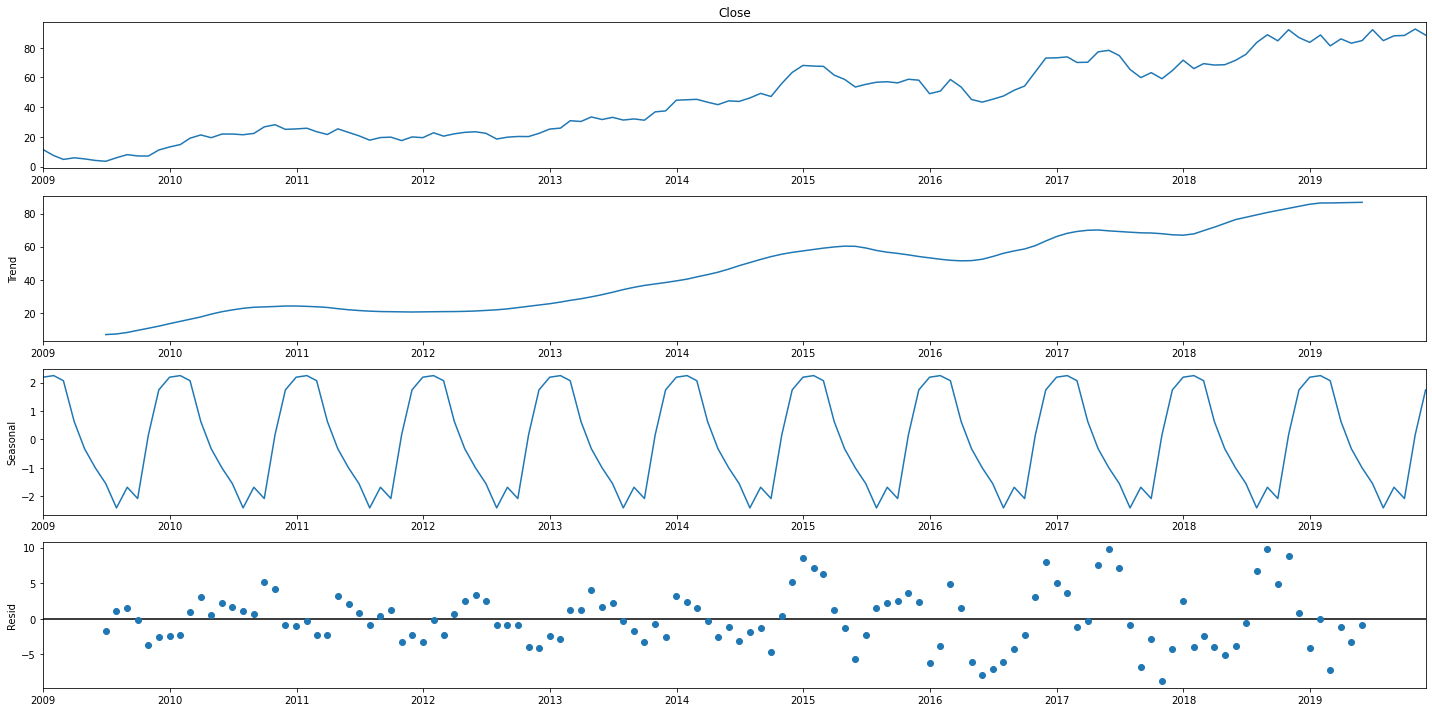

-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 202.1539617184406
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 445.17177553436073
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 380.0424686069578
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 366.7423716134221
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 382.38315594429343
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 388.9292242382287
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 329.1827796703372
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 312.3024160982369
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 382.33986918633605
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 380.67481974041465
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 371.1379546977678
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 436.1183964748335
Order: (1, 0, 1)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 357.71342990106444
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 389.84816887209234
Order: (1, 0, 1)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 441.04292632056007
Order: (1, 0, 1)
-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 418.0465530314736
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 409.40180263479965
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 332.3033588801572
Order: (1, 0, 1)


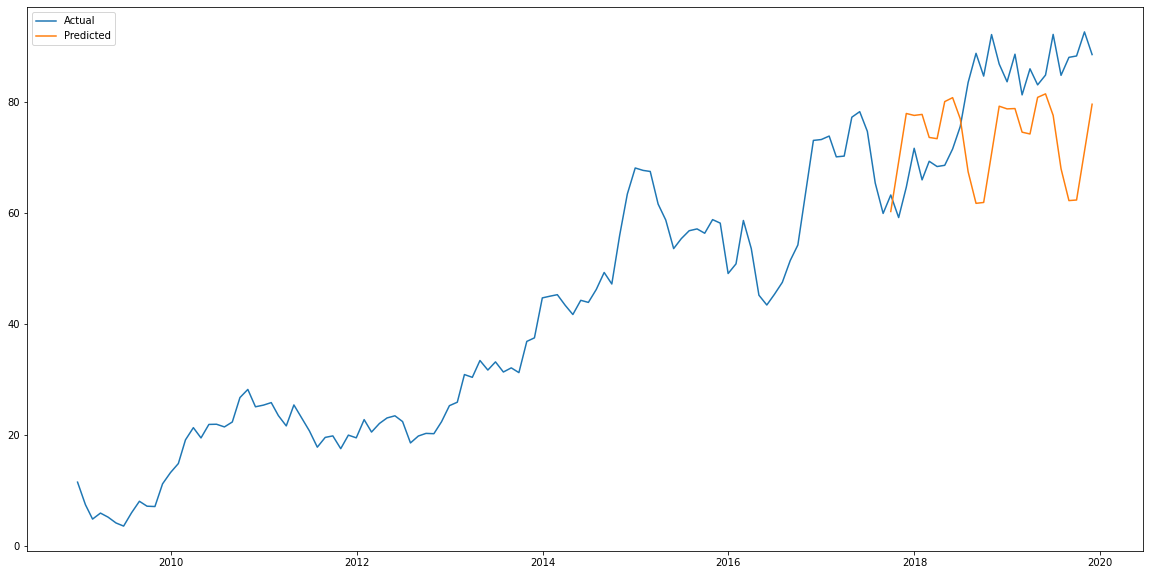

Seasonal_order: (0, 1, 0, 12) 
MSE: 202.1539617184406
Order: (1, 0, 1)


In [8]:
analyze_stock('UAL', '2009-01-01', '2020-01-01')

[*********************100%***********************]  1 of 1 completed


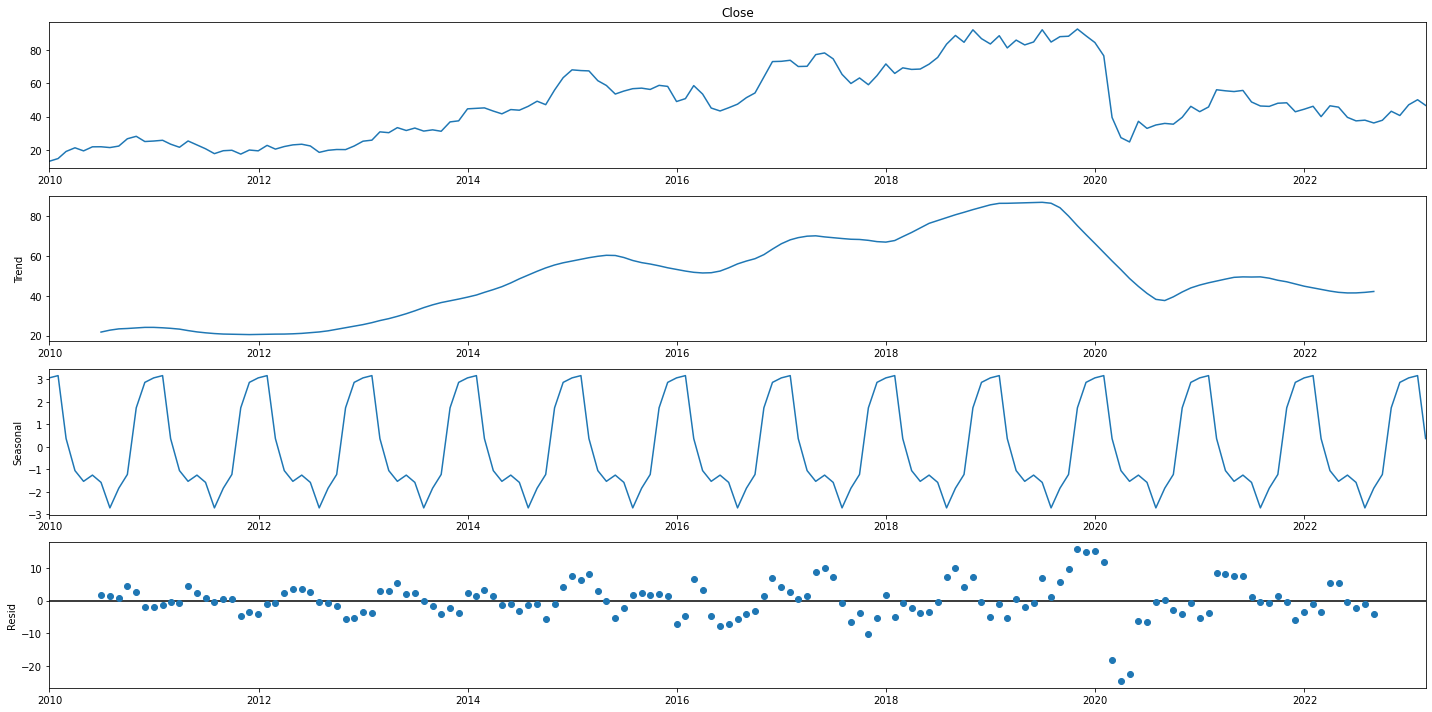

-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 2016.1536017111519
Order: (0, 0, 0)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 2016.1536017111519
Order: (0, 0, 0)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 2120.7943159088077
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 990.3155568596768
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 1555.7595577646957
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 357.5323172559934
Order: (0, 0, 0)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 1388.918481081393
Order: (0, 0, 0)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 1512.3686119006406
Order: (0, 0, 0)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 1302.8073358029046
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 1697.5895279212536
Order: (0, 0, 0)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 1549.6742915695427
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 1851.8287489157597
Order: (0, 0, 0)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 4962.7727507435075
Order: (0, 0, 0)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 4884.308738955
Order: (0, 0, 0)
-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 2321.535082890051
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 3331.0816095608584
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 2592.312589270323
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 3606.918945659344
Order: (0, 0, 0)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 960.6318776434445
Order: (0, 0, 0)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 1052.624112181282
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 958.7845095029114
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 1165.8445116869557
Order: (0, 0, 0)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 1125.4756904676913
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 1186.9745980241746
Order: (0, 0, 0)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 1311.2436560624851
Order: (0, 0, 0)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 1870.4210772504268
Order: (0, 0, 0)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 1478.203371879592
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 2552.7748343542517
Order: (0, 0, 0)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 1750.1724939652058
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 1603.2800223835602
Order: (0, 0, 0)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 3763.290328916218
Order: (0, 0, 0)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 3026.45424337127
Order: (0, 0, 0)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 3944.673783510606
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 3141.768724628071
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 2676.453166532151
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 3037.684102660245
Order: (0, 0, 0)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 980.7565918508494
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 1274.1594231462582
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 1127.497655836544
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 959.6994375136042
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 1269.410251923598
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 1108.7377694795691
Order: (0, 0, 0)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1798.1394797697078
Order: (0, 0, 0)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 2379.5191323104573
Order: (0, 0, 0)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 1696.2193211243832
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 2184.1956432973243
Order: (0, 0, 0)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 1698.1764609959123
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 2244.699697412798
Order: (0, 0, 0)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 3733.1269877890054
Order: (0, 0, 0)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 3101.849832332776
Order: (0, 0, 0)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 3838.54016330758
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 3047.547616121286
Order: (0, 0, 0)
-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 2634.2621050612324
Order: (0, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 2989.779308577837
Order: (0, 0, 0)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 2004.400213092964
Order: (0, 0, 1)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 2004.400213092964
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 2121.911908383874
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 1029.7152427666404
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 1611.3777459708788
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 335.0690774499406
Order: (0, 0, 1)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 1201.7845513495506
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 1387.8362257378667
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 1108.5102309418955
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 1455.4909564644936
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 1257.4256153079536
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 1680.6739119285248
Order: (0, 0, 1)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 5081.947390384519
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 4298.009929707635
Order: (0, 0, 1)
-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 2021.0880833574363
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 3073.55001683328
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 2259.3407063384757
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 3306.5117413506723
Order: (0, 0, 1)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 778.4839340971722
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 854.3647572727673
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 777.1100855812184
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 890.3479138860498
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 831.0244599773857
Order: (0, 0, 1)
-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 765.6276414573699
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 1134.9878607584642
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 1505.7279904726388
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 1295.362509387393
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 2066.3583869824865
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 1445.9367519141229
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 1418.681608655304
Order: (0, 0, 1)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 3357.711563525531
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 2815.562045782697
Order: (0, 0, 1)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 2329.3163960017137
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 2963.3153310319212
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 2362.661774939017
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 2833.477772339105
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 754.5285472591096
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 920.2957305394723
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 766.1331374344086
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 1108.8447987980312
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 1070.500788275136
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 749.3459872041694
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1415.9078317155859
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 1985.7802390156596
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 1390.7355460128422
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 1797.4830914038903
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 1364.238553527765
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 1865.806608773199
Order: (0, 0, 1)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 3243.679419404079
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 2905.520108866725
Order: (0, 0, 1)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 3449.565635731982
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 2859.5102495435763
Order: (0, 0, 1)
-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 2328.793271513414
Order: (0, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 2860.52996800111
Order: (0, 0, 1)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 2103.424724516933
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 2103.424724516933
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 1968.590087624148
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 880.8644562386227
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 1591.3351758309918
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 314.27681913536526
Order: (0, 0, 2)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 1045.5878935919145
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 1326.6768673015383
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 924.7804910490017
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 1281.9320869501792
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 1093.5904966524424
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 1557.138836059591
Order: (0, 0, 2)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 4914.251539335517
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 3882.0192910731257
Order: (0, 0, 2)
-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 1818.4617604788777
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 2905.8559477468284
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 2088.8611852812714
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 3117.5682749574
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 570.6489103531344
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 693.9990923315096
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 554.4959255354772
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 562.7453128622301
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 744.3692460858038
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 572.4881025047357
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 1020.8897923592446
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 1263.9152046847669
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 1136.5539736211506
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 1189.915890414184
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 1103.9799042372174
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 1288.2386178915203
Order: (0, 0, 2)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 2914.6669546796197
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 2696.32973099747
Order: (0, 0, 2)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 2087.712932064069
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 2910.2102228155227
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 1903.8852580926193
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 2676.2602113118915
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 620.6216461712622
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 683.9648028352642
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal 

-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 684.7178794000063
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 646.9788206407965
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 215.35334819360378
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 983.5094287369849
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1132.1855499009635
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 1660.9270725012186
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 1112.9588570516623
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 1419.3334089460336
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 1096.7556110282371
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 1654.0425229490575
Order: (0, 0, 2)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 2822.4153023303074
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 2841.985685922914
Order: (0, 0, 2)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 3103.403972010753
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 2781.5233345994993
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 2087.9686645230518
Order: (0, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 2738.5668530945986
Order: (0, 0, 2)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 169.4105947778671
Order: (0, 1, 0)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 169.4105947778671
Order: (0, 1, 0)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 165.50099249038317
Order: (0, 1, 0)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 170.733988781164
Order: (0, 1, 0)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 165.88739457540402
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 227.34560819250294
Order: (0, 1, 0)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 9987.542090441657
Order: (0, 1, 0)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 919.2171071262478
Order: (0, 1, 0)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 676.5090075495625
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 97.80289825316231
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 618.8377030425956
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 98.49068019775878
Order: (0, 1, 0)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 78364.41437390517
Order: (0, 1, 0)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 6928.89974737714
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 13584.257320322442
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 1265.9272059194816
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 5858.603679740265
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 1183.9782066567102
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 165.46590956011858
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 170.49827848649863
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 201.80640658216473
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 187.5846752880974
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 164.28397496436352
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 223.4080627132217
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 3034.54790417866
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 186.13547366173142
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 625.1784229731134
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 98.26860292926555
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 610.7712128115584
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 112.43164429064399
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 23753.788712255075
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 2054.49792715211
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 6156.714337820827
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 1159.7904599511862
Order: (0, 1, 0)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 3857.5997865535146
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1108.0392806156176
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 167.09769761554242
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 226.47183204700139
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 168.85765027804555
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 223.87441354711694
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 166.06291482512563
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 190.3734551355852
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1411.365693355025
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 133.8281214680335
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 626.5267462309741
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 104.11257420918999
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 663.0309112750033
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 87.90586898265289
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 17444.0265304402
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 1587.0296748830592
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 6219.829793632498
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 1123.2551736056548
Order: (0, 1, 0)
-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 5843.155917517883
Order: (0, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 1099.16883380867
Order: (0, 1, 0)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 203.27522843970635
Order: (0, 1, 1)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 203.27522843970635
Order: (0, 1, 1)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 202.70202531382614
Order: (0, 1, 1)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 198.27713485289254
Order: (0, 1, 1)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 199.25069370118266
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 259.676667152019
Order: (0, 1, 1)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 11030.742883176672
Order: (0, 1, 1)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 1011.6663582958582
Order: (0, 1, 1)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 737.7360728700612
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 97.5590092745621
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 699.2142360961371
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 98.48071380857017
Order: (0, 1, 1)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 82666.99678223935
Order: (0, 1, 1)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 7362.641201926517
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 14890.07735321792
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 1350.3258288366833
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 6503.81789446238
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 1277.011793021928
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 202.74786222272638
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 198.3962357679263
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 251.2280626488694
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 202.64820575317552
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 205.0079222940426
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 255.71202954107434
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 3461.4155737303145
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 203.12299508853397
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 703.715714029308
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 98.21504668714665
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 690.7505468160189
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 111.73936845051958
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 26801.498193726038
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 2249.337174933981
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 6904.147125296716
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 1252.3464737179281
Order: (0, 1, 1)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 5134.468090598344
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1197.8457602315802
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 193.9971980094047
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 259.62783145489897
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 197.95181356119642
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 256.4426526961681
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 184.0481624987652
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 213.17311747368097
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1605.5138686884704
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 142.2363255742914
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 687.9585167468802
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 104.22540161203791
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 717.2549767406017
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 91.21780342760471
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 18579.123170023093
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 1735.380113409716
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 6772.95341809546
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 1224.2949991523315
Order: (0, 1, 1)
-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 6454.876669401947
Order: (0, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 1186.4920242132662
Order: (0, 1, 1)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 194.11244366602133
Order: (0, 1, 2)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 194.11244366602133
Order: (0, 1, 2)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 155.40924175717043
Order: (0, 1, 2)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 187.96102628839571
Order: (0, 1, 2)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 154.68017294150246
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 293.6510892240002
Order: (0, 1, 2)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 10976.520791110956
Order: (0, 1, 2)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 1014.0443672552153
Order: (0, 1, 2)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 681.3732048297359
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 95.79092254352378
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 636.344567418005
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 103.85713425570006
Order: (0, 1, 2)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 81730.85560342245
Order: (0, 1, 2)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 7394.87572453025
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 14797.90406402025
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 1343.9099289641636
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 6498.11425070175
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 1285.884669459912
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 157.74776444664352
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 188.41424072934495
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 236.1288533602979
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 211.1024296023889
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 163.8013339659565
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 285.4574883562834
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 3452.974494524343
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 205.91423952868536
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 640.7978907139182
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 101.17002572119489
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 631.8664516978787
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 119.3937729840828
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 24784.561020276156
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 2256.700921308182
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 6967.223577627207
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 1265.4354257840082
Order: (0, 1, 2)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 5141.543481248362
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1210.234973148858
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 147.4895732107182
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 287.26676759944615
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 153.6663940165947
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 281.44190584759616
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 146.9841574394293
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 226.84924931686965
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1452.502650958114
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 155.9424173138377
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 636.5888691185515
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 111.80953592995199
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 662.8548098311678
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 95.06292916809542
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 18504.04891768894
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 1763.9557200611052
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 6668.81895631027
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 1238.7109816494558
Order: (0, 1, 2)
-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 6416.257834596774
Order: (0, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 1197.366875260668
Order: (0, 1, 2)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 8234.684252682131
Order: (0, 2, 0)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 8234.684252682131
Order: (0, 2, 0)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 7532.704285102408
Order: (0, 2, 0)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 6204.981135169368
Order: (0, 2, 0)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 5315.562820404246
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 6686.064803259478
Order: (0, 2, 0)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 197250.28792448607
Order: (0, 2, 0)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 39745.99723660172
Order: (0, 2, 0)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 27176.97595809113
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 13570.27791603524
Order: (0, 2, 0)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 27077.401158894652
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 14109.051534597496
Order: (0, 2, 0)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 848015.4079898959
Order: (0, 2, 0)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 99731.01754150457
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 250859.98590310477
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 53648.294954581106
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 123785.54242746196
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 53797.018922571835
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 7643.544028356769
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 6708.164033229412
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 9113.258482667894
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 6266.641344227248
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 4986.833451732401
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 6559.099543065083
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 93002.22832301844
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 25497.957542749173
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 27085.74833025059
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 13969.048837612783
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 26397.643584205714
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 14166.77382304486
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 595830.6868977755
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 73311.08034670589
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 157783.08051352896
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 53831.51608754604
Order: (0, 2, 0)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 124682.71392402216
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 52396.856862404005
Order: (0, 2, 0)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 5547.09206136679
Order: (0, 2, 0)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 6369.161378527945
Order: (0, 2, 0)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 4738.041831612569
Order: (0, 2, 0)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 6369.108686469844
Order: (0, 2, 0)
-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 5845.464115310206
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 5669.897912613683
Order: (0, 2, 0)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 37569.442011919964
Order: (0, 2, 0)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 18049.6861820995
Order: (0, 2, 0)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 26088.11680192503
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 13212.933764773723
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 23721.357564177844
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 12861.039724694612
Order: (0, 2, 0)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 250393.13644035775
Order: (0, 2, 0)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 64177.363688472986
Order: (0, 2, 0)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 115579.33908706652
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 54656.895233313386
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 113511.18779940886
Order: (0, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 52267.10429153041
Order: (0, 2, 0)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 2028.6354608677043
Order: (0, 2, 1)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 2028.6354608677043
Order: (0, 2, 1)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 2115.3433407968923
Order: (0, 2, 1)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 2054.089391114804
Order: (0, 2, 1)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 2129.572916334365
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 3422.690080172026
Order: (0, 2, 1)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 31575.105917477973
Order: (0, 2, 1)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 5073.792783327986
Order: (0, 2, 1)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 11033.839420269669
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 2596.4225174552907
Order: (0, 2, 1)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 10761.556154926682
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 2864.027667293567
Order: (0, 2, 1)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 114673.30659679996
Order: (0, 2, 1)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 31761.22647201146
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 55044.29442911067
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 6508.572268302381
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 40427.82511121641
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 5594.428238101473
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 2117.3412135487724
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 2046.940144565881
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 2651.581248889462
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 2581.962393647098
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 2506.131354487429
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 3489.0118800052483
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 19485.998135097954
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 1858.6505645846444
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 10777.148356843722
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 2761.883077579475
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 11535.331432195764
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 3296.5539768765393
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 52963.53907882878
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 4708.028294719985
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 36998.23318365845
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 5497.4361443141715
Order: (0, 2, 1)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 40078.49774328568
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 5597.493410473932
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 2149.2763697043824
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 3397.0651584572697
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 2475.228600019218
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 3612.8137991994818
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 2460.159098346665
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 3058.6643597146613
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 18372.07698966008
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 3750.456846160678
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 13000.589593004577
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 3689.7214509642286
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 46751.54741242028
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 3242.387280498018
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 102873.28501321338
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 6574.804978564224
Order: (0, 2, 1)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 50807.10567041243
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 5466.49427086684
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 51241.669159470424
Order: (0, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 5764.840460537174
Order: (0, 2, 1)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 507.9673091855194
Order: (0, 2, 2)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 507.9673091855194
Order: (0, 2, 2)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 549.1440538061233
Order: (0, 2, 2)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 493.535509099923
Order: (0, 2, 2)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 533.3954881749727
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 765.028883377327
Order: (0, 2, 2)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 20053.076486963117
Order: (0, 2, 2)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 3267.375632670656
Order: (0, 2, 2)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 6297.710613363301
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 1271.7451801410302
Order: (0, 2, 2)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 6226.845450834843
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 1358.2116952110293
Order: (0, 2, 2)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 100898.65186469446
Order: (0, 2, 2)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 12500.18254525667
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 39871.09408609469
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 6868.168641752576
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 30453.080301685317
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 5972.584372459413
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 546.0481975281195
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 494.2231717532311
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 690.2445918387099
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 548.7168118448111
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 598.3114356906269
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 770.4224500474734
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 11393.482899030332
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 1040.732324699607
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 6233.5553476260375
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 1333.7615129324467
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 6484.02141429759
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 1520.7995057133876
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 41917.58739832371
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 4949.663183653214
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 26819.350082312452
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 5866.828521433275
Order: (0, 2, 2)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 30092.126811330163
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 6032.938331484695
Order: (0, 2, 2)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 523.5728373659417
Order: (0, 2, 2)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 786.6211373236331
Order: (0, 2, 2)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 582.5452155662789
Order: (0, 2, 2)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 801.9073081075713
Order: (0, 2, 2)
-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 145.42852858420758
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 613.7355297805759
Order: (0, 2, 2)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 10889.265394324766
Order: (0, 2, 2)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 1971.6091667399596
Order: (0, 2, 2)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 6417.687737663638
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 1763.6291425924842
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 12630.17905929408
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 1618.315756799036
Order: (0, 2, 2)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 86317.78161644995
Order: (0, 2, 2)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 5126.517996099721
Order: (0, 2, 2)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 38571.67473103781
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 5823.447549058127
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 36158.38212532457
Order: (0, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 6227.098036931332
Order: (0, 2, 2)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 281.6780303333753
Order: (1, 0, 0)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 281.6780303333753
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 293.0189762433349
Order: (1, 0, 0)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 286.0771848168293
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 294.9024216734348
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 358.88117342154254
Order: (1, 0, 0)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 2481.6603477655544
Order: (1, 0, 0)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 248.4223725977997
Order: (1, 0, 0)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 174.44143882647631
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 56.286542676799655
Order: (1, 0, 0)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 127.51426846111994
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 55.66542221340116
Order: (1, 0, 0)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 22067.858047440885
Order: (1, 0, 0)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 1620.0098229866824
Order: (1, 0, 0)
-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 7862.890630616963
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 421.4393148396098
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 2231.498909745554
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 481.4736737085685
Order: (1, 0, 0)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 293.26315624370415
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 285.30937333781054
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 312.12764490093747
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 324.2970479979518
Order: (1, 0, 0)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 310.620032419843
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 353.4796935762787
Order: (1, 0, 0)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 555.4328934479804
Order: (1, 0, 0)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 148.61379365165232
Order: (1, 0, 0)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 131.98654163189525
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 55.82844183405251
Order: (1, 0, 0)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 125.7110000282764
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 55.24356290157675
Order: (1, 0, 0)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 5842.50340641961
Order: (1, 0, 0)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 599.7368178037586
Order: (1, 0, 0)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 3045.2051750941378
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 495.5394272612143
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 2202.209093550481
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 511.057455700502
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 299.467815314787
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 358.3236409414464
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 288.8822360101324
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 355.15707289172155
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 260.31213400349674
Order: (1, 0, 0)
-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 309.6227005510151
Order: (1, 0, 0)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 265.09775368417115
Order: (1, 0, 0)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 85.26362025736816
Order: (1, 0, 0)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 119.90864558203512
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 60.38890777205239
Order: (1, 0, 0)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 133.5141564213078
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 91.00083540836258
Order: (1, 0, 0)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 8887.457024526859
Order: (1, 0, 0)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 535.8988716881388
Order: (1, 0, 0)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 2739.726104044647
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 497.8733896733777
Order: (1, 0, 0)
-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 2394.768992198553
Order: (1, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 501.80204344064276
Order: (1, 0, 0)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 356.5027876405568
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 356.5027876405568
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 377.9666358118993
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 351.80968932905625
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 373.91273731151335
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 433.51266940672224
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 1360.9147161141395
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 274.2142570930215
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 136.08550652110893
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 51.491215099368304
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 108.8402375182125
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 50.341007963418114
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 15877.524868116052
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 1305.665136761795
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 3111.8899849484146
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 643.0988391304611
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 1475.7896331936465
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 773.9582091386496
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 377.38954953704916
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 352.1128571102578
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 376.46427236232205
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 402.02837020361744
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 414.12557944332946
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 427.7637000225845
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 300.88596856913375
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 184.70563141332303
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 110.99078722536184
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 50.632831941449695
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 107.7963831566736
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 48.93168302143792
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 3128.8442948402776
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 826.7123426108749
Order: (1, 0, 1)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 1686.2943690243037
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 803.4748088394115
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 1472.8468724535214
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 837.0809433740477
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 369.7322920262047
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 434.7194071953461
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 362.0843014002042
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 430.0053055107152
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 324.0382352711011
Order: (1, 0, 1)
-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 373.33898507995343
Order: (1, 0, 1)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 171.23877620330472
Order: (1, 0, 1)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 95.26350114779268
Order: (1, 0, 1)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 104.06671783535526
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 56.08178690895219
Order: (1, 0, 1)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 112.80368463523445
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 99.47170782671802
Order: (1, 0, 1)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 6539.958626372296
Order: (1, 0, 1)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 805.7726083393767
Order: (1, 0, 1)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 2039.923491916591
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 801.9880499143242
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 2150.5017086744306
Order: (1, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 810.345150275037
Order: (1, 0, 1)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 371.5213046881838
Order: (1, 0, 2)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 371.5213046881838
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 341.71008869147556
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 365.540231257526
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 338.9948751745703
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 523.1835517176734
Order: (1, 0, 2)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 1409.7335159380414
Order: (1, 0, 2)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 313.62922501036513
Order: (1, 0, 2)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 112.64218070969677
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 57.15289904387893
Order: (1, 0, 2)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 87.30271964036746
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 52.86622819296508
Order: (1, 0, 2)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 17334.05264233007
Order: (1, 0, 2)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 1249.186231162074
Order: (1, 0, 2)
-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 4438.41959896329
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 864.0048475965339
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 1303.2136015986766
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 973.4592834786449
Order: (1, 0, 2)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 343.0415682292478
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 366.3152236351878
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 342.5130090706395
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 423.46124455556264
Order: (1, 0, 2)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 382.823640654025
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 511.10516177106257
Order: (1, 0, 2)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 235.53255214449754
Order: (1, 0, 2)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 203.53653666777694
Order: (1, 0, 2)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 88.62333390069911
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 53.890665749585835
Order: (1, 0, 2)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 87.3365237632239
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 51.764510599735246
Order: (1, 0, 2)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 4570.941352997076
Order: (1, 0, 2)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 955.6764420149519
Order: (1, 0, 2)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 1700.683413640785
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 991.4503135078076
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 1244.762536417758
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1029.999825908503
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 330.71298296468996
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 517.7877628513343
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 320.32355386136953
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 509.2984563110948
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 292.103892409496
Order: (1, 0, 2)
-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 391.7218209646462
Order: (1, 0, 2)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 119.86387279058103
Order: (1, 0, 2)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 106.09901480266959
Order: (1, 0, 2)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 88.27445207879006
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 61.45543597801508
Order: (1, 0, 2)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 96.23803422401619
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 120.26634819816661
Order: (1, 0, 2)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 5455.947079721688
Order: (1, 0, 2)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 961.8311758506301
Order: (1, 0, 2)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 1536.1708695033212
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 980.7132210936641
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 1872.2739198168288
Order: (1, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 1001.5293139197317
Order: (1, 0, 2)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 199.3182147206286
Order: (1, 1, 0)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 199.3182147206286
Order: (1, 1, 0)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 184.35623232153108
Order: (1, 1, 0)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 193.38765411595125
Order: (1, 1, 0)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 181.36686003658704
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 272.5946228613207
Order: (1, 1, 0)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 10949.956772209218
Order: (1, 1, 0)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 1020.2295563154947
Order: (1, 1, 0)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 702.4429838480219
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 95.86380624747
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 664.8755621804291
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 103.00477252243223
Order: (1, 1, 0)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 82216.33212850132
Order: (1, 1, 0)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 7429.750271617482
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 14785.491407672846
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 1357.6374630524351
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 6466.324162556204
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 1287.721447815793
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 185.17012015752022
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 193.66776710099228
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 246.93927099612216
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 209.69233940517523
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 190.0766981819005
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 267.1201360789579
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 3436.0341602882017
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 210.36121232461284
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 669.0156567205402
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 100.72081735660248
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 658.9702365356783
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 117.33481455744855
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 26257.617844119024
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 2270.2026401198127
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 6756.612315762786
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 1265.2336195721546
Order: (1, 1, 0)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 4300.720605804443
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1210.8789031642464
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 175.05434451584284
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 271.2748248613708
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 181.7715916685272
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 267.06446829971685
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 177.22966464017168
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 218.5534158218939
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1566.27879582502
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 149.68889622375715
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 663.2791018847154
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 108.48610482992756
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 698.8098086811441
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 93.84687490970482
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 18713.91344707615
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 1761.2191383358374
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 6772.931489782291
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 1238.025545498368
Order: (1, 1, 0)
-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 6460.931052369486
Order: (1, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 1197.920122550837
Order: (1, 1, 0)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 194.74573136036275
Order: (1, 1, 1)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 194.74573136036275
Order: (1, 1, 1)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 175.59280999221056
Order: (1, 1, 1)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 189.18333200652634
Order: (1, 1, 1)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 173.84978715870386
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 275.3894368573466
Order: (1, 1, 1)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 11181.74288885204
Order: (1, 1, 1)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 1019.2815057999583
Order: (1, 1, 1)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 690.7476200737157
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 96.02407256766857
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 647.4071101087981
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 102.83326644832883
Order: (1, 1, 1)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 83579.22318690622
Order: (1, 1, 1)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 7530.28286512958
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 14977.61630192216
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 1360.813711443082
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 7035.367108267149
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 1292.8268917273097
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 176.54752921007147
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 189.56752215986603
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 242.26096369712621
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 208.03401857083156
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 181.74483492741047
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 268.84129601528326
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 3450.827009457058
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 205.18244459595036
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 652.0590559169964
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 100.60117715604392
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 642.5356603092107
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 118.00441746822713
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 26580.323703103597
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 2256.965628937505
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 7685.079197371257
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 1271.0907078853138
Order: (1, 1, 1)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 5682.091100616599
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1214.226723070175
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 167.42845322616813
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 272.67777135746877
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 172.17678526110228
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 267.84578430603983
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 163.9540149272391
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 217.7758182072294
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1471.772791155271
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 153.51378008520487
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 654.5838344734885
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 110.48118825836801
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 699.0913007328318
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 95.05068452803408
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 19141.69179102895
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 1769.2124799825483
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 7431.411706110919
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 1240.6979527123012
Order: (1, 1, 1)
-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 7015.397460359902
Order: (1, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 1201.1461776857714
Order: (1, 1, 1)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 195.55575946724372
Order: (1, 1, 2)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 195.55575946724372
Order: (1, 1, 2)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 154.0428945346456
Order: (1, 1, 2)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 189.34014008789828
Order: (1, 1, 2)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 153.25573291708707
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 293.95914569674187
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 11547.239505340975
Order: (1, 1, 2)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 1013.1932226820896
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 687.6733761603964
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 95.85151499149563
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 643.0546593328348
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 103.45155567098081
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 83312.95647115668
Order: (1, 1, 2)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 7502.962180744102
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 15213.544566972825
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 1349.6122483932932
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 9426.764891378218
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 1290.5324562797111
Order: (1, 1, 2)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 156.68714169890242
Order: (1, 1, 2)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 189.75977577767736
Order: (1, 1, 2)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 235.59493956212214
Order: (1, 1, 2)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 211.62577715420827
Order: (1, 1, 2)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 162.83723302675958
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 285.8897352974751
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 3480.011744794175
Order: (1, 1, 2)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 290.4833292145268
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 647.3958500108015
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 100.94668368043848
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 640.6046445466789
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 118.96627079189011
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 28031.76771543971
Order: (1, 1, 2)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 815.3379320192447
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 7714.981422725295
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 1268.9327118899832
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 5714.512991529658
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1212.5969419144203
Order: (1, 1, 2)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 146.11458119683874
Order: (1, 1, 2)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 287.68798542528486
Order: (1, 1, 2)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 153.09176753491298
Order: (1, 1, 2)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 281.8962154966596
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 145.44859269445112
Order: (1, 1, 2)
-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 227.1375033587965
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1448.7863905965487
Order: (1, 1, 2)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 155.71413119339456
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 654.8424557758555
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 111.66739300946361
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 696.4907241044755
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 95.06224608608524
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 23216.719631610853
Order: (1, 1, 2)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 1769.1611977190823
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 7670.11620460293
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 1241.0525904303465
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 7339.258167662127
Order: (1, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 1198.393154283352
Order: (1, 1, 2)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 72.15515575414057
Order: (1, 2, 0)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 72.15515575414057
Order: (1, 2, 0)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 281.3647359098591
Order: (1, 2, 0)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 141.64533381354553
Order: (1, 2, 0)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 343.81882071962934
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 104.76894391561126
Order: (1, 2, 0)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 64862.6388587157
Order: (1, 2, 0)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 7269.732790976182
Order: (1, 2, 0)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 1679.2838862052101
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 757.9389379512684
Order: (1, 2, 0)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 1464.0453170950968
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 1270.5363456962223
Order: (1, 2, 0)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 332743.4432826253
Order: (1, 2, 0)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 43964.29893772752
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 85666.93416348746
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 11744.150874376508
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 37841.33495711569
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 12167.035753470069
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 248.89716649825635
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 102.26731497847355
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 107.39143968770492
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 71.81980728767701
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 775.5778647787748
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 107.53860517212493
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 23561.76611505279
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 3320.477751425733
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 1484.11177564972
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 1045.9034401874444
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 1255.0463740257812
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 1273.577411591032
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 282587.12930775504
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 20688.31765705051
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 45213.901897234806
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 12169.495309249938
Order: (1, 2, 0)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 36485.46577379295
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 12151.813399093688
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 404.74683310790726
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 163.6417753887351
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 1134.1119363116588
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 130.3030819807865
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 936.3280556264622
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 144.3280312431965
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 2264.2933901667693
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 1441.8820074051137
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 3072.3618074970354
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 825.9850030802602
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 2011.5437384834709
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 674.5411616295709
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 75268.85853205615
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 17097.25777193912
Order: (1, 2, 0)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 27168.674291846324
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 11940.383762199366
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 26702.306083287363
Order: (1, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 12138.641313133861
Order: (1, 2, 0)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 246.22657219525706
Order: (1, 2, 1)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 246.22657219525706
Order: (1, 2, 1)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 244.28059847353433
Order: (1, 2, 1)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 235.56996107914932
Order: (1, 2, 1)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 235.48691668763297
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 392.459690812308
Order: (1, 2, 1)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 18812.14924425509
Order: (1, 2, 1)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 2832.1352369385622
Order: (1, 2, 1)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 5167.94337062651
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 942.4027088753355
Order: (1, 2, 1)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 5129.240677115504
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 1046.3232873774214
Order: (1, 2, 1)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 99767.42549042549
Order: (1, 2, 1)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 12593.92174617434
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 38482.0699237672
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 6882.594402366053
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 29021.645569885066
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 6044.486746008808
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 245.12205327747685
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 236.5604625832696
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 356.323350104033
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 277.9781220071847
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 271.1220940662599
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 393.62414871280475
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 10058.540929502748
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 894.6487302479471
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 5126.51289836072
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 1012.1686533844595
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 5336.620728015139
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 1183.51876799352
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 42202.2412563375
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 4974.31074462681
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 25020.72832059344
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 5940.8417200453305
Order: (1, 2, 1)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 28488.536425933627
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 6075.412051397246
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 227.5762246742258
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 402.37873488762364
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 256.46748584857414
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 408.14823203811216
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 139.71013491235658
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 289.7034530918646
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 8873.9515520306
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 1654.965792439759
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 5398.118990153918
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 1381.4191263232008
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 32762.21866346024
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 1224.9207948813814
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 83776.05925752665
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 5189.0907497654725
Order: (1, 2, 1)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 36382.89041880228
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 5890.804853606742
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 34689.14597566105
Order: (1, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 6277.67784931869
Order: (1, 2, 1)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 180.85945076995142
Order: (1, 2, 2)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 180.85945076995142
Order: (1, 2, 2)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 170.91499554835792
Order: (1, 2, 2)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 176.91562754526458
Order: (1, 2, 2)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 169.66904289673198
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 257.7545482926179
Order: (1, 2, 2)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 30191.094077979487
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 4801.918801916089
Order: (1, 2, 2)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 10499.807253220868
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 2332.4534930577097
Order: (1, 2, 2)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 10395.46339533539
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 2480.1763143002
Order: (1, 2, 2)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 112847.10714481512
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 19075.49601567438
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 51257.318135789494
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 6972.323546449508
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 39339.16825668024
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 5960.944993889613
Order: (1, 2, 2)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 171.31014207114805
Order: (1, 2, 2)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 177.29892245122807
Order: (1, 2, 2)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 268.5012968357354
Order: (1, 2, 2)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 201.25060481832713
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 183.70831464307395
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 255.25970837640187
Order: (1, 2, 2)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 17613.1053391493
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 1698.8910444788735
Order: (1, 2, 2)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 10406.3885356334
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 2436.817119752226
Order: (1, 2, 2)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 11014.413251775874
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 2719.458818986619
Order: (1, 2, 2)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 54698.32196232231
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 4955.311209494259
Order: (1, 2, 2)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 36634.14381161674
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 5823.8085747324985
Order: (1, 2, 2)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 39247.50728417162
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 5973.243036419326
Order: (1, 2, 2)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 162.1913095689609
Order: (1, 2, 2)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 259.74969993116076
Order: (1, 2, 2)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 148.08133241270582
Order: (1, 2, 2)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 257.5491152694658
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 105.33020098965083
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 197.45789119225904
Order: (1, 2, 2)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 17184.809713587936
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 3140.4732301958893
Order: (1, 2, 2)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 10807.364582067752
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 3064.8995829767546
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 45131.35667965866
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 2865.39999662104
Order: (1, 2, 2)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 99176.25164426841
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 5224.231747072746
Order: (1, 2, 2)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 48575.053322905136
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maxim

-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 5820.148377554781
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 44194.89575109037
Order: (1, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 6054.595554804229
Order: (1, 2, 2)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 369.57600504091647
Order: (2, 0, 0)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 369.57600504091647
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 372.6694833998746
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 364.04896482325
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 368.75001026716836
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 475.5269149710485
Order: (2, 0, 0)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 1069.9767415622612
Order: (2, 0, 0)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 303.27279469681196
Order: (2, 0, 0)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 115.04683198015243
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 56.79885878606723
Order: (2, 0, 0)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 91.60923066166487
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 52.99069970239414
Order: (2, 0, 0)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 14678.580003271996
Order: (2, 0, 0)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 1251.2151368068494
Order: (2, 0, 0)
-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 2433.0165406453057
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 816.1916440939631
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 1129.2230537069295
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 951.1700470082143
Order: (2, 0, 0)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 372.57123392936063
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 364.5245262867202
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 374.02487631725774
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 405.0242696688787
Order: (2, 0, 0)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 408.01394896908033
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 467.3826338339246
Order: (2, 0, 0)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 217.6346981835211
Order: (2, 0, 0)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 206.39487731924552
Order: (2, 0, 0)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 93.11448137743997
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 53.905294349992026
Order: (2, 0, 0)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 91.44125909061846
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 51.46894682127175
Order: (2, 0, 0)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 2942.224619522724
Order: (2, 0, 0)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 961.8474086485836
Order: (2, 0, 0)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 1131.0172998942767
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 978.4306619479763
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 886.5662868450465
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1021.9124274384072
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 362.69797942626303
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 475.7604795093814
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 355.92195824486424
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 469.38573496158733
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 347.9270870056992
Order: (2, 0, 0)
-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 388.8282500315882
Order: (2, 0, 0)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 130.18271358270198
Order: (2, 0, 0)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 103.97826173138137
Order: (2, 0, 0)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 91.70516353364687
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 59.8992425146147
Order: (2, 0, 0)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 100.08786158252828
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 114.20610873738963
Order: (2, 0, 0)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 5507.183947871877
Order: (2, 0, 0)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 957.0295468835993
Order: (2, 0, 0)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 1583.3036378728407
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 970.5696973884603
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 1251.0427703053565
Order: (2, 0, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 994.0296526735108
Order: (2, 0, 0)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 368.8145852648121
Order: (2, 0, 1)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 368.8145852648121
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 366.2196885879988
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 363.5888821158399
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 363.2535819773143
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 494.9536228538098
Order: (2, 0, 1)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 332.7397346477977
Order: (2, 0, 1)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 390.72129249969
Order: (2, 0, 1)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 101.49810281859155
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 58.95316064297752
Order: (2, 0, 1)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 82.41773112094762
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 54.756274506716096
Order: (2, 0, 1)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 1978.8120972372528
Order: (2, 0, 1)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 1498.6421821376362
Order: (2, 0, 1)
-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 6516.982694577
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 1650.0105077404414
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 2323.0032798042275
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 1754.6292662198834
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 366.41263008519644
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 364.20447944429816
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 366.746632058913
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 437.92658108226556
Order: (2, 0, 1)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 398.74003340035284
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 485.11058367961687
Order: (2, 0, 1)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 157.47194230381513
Order: (2, 0, 1)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 208.0312280944159
Order: (2, 0, 1)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 82.61034181245057
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 55.751104946645
Order: (2, 0, 1)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 83.01656206367113
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 53.928319082654994
Order: (2, 0, 1)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 4700.452764313489
Order: (2, 0, 1)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 1552.0097451610295
Order: (2, 0, 1)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 3105.2654152295336
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 1755.415084246974
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1748.8829568131655
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 357.2297956775262
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 493.9099617394292
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 348.71293242000945
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 487.28620537284223
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 322.10571942194406
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 393.2202450453068
Order: (2, 0, 1)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 177.35355386798028
Order: (2, 0, 1)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 115.01220458733053
Order: (2, 0, 1)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 116.32384503345955
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 65.49033358344644
Order: (2, 0, 1)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 117.70486237096897
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 130.53072295295834
Order: (2, 0, 1)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 8399.049158283364
Order: (2, 0, 1)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 1708.432154256618
Order: (2, 0, 1)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 2960.2480926349044
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 1693.0869273317355
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 2510.353354606366
Order: (2, 0, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 1700.5238920488587
Order: (2, 0, 1)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 371.0236064413305
Order: (2, 0, 2)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 371.0236064413305
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 337.4053410813158
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 364.8639597051863
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 334.3216602767763
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 521.2818770877765
Order: (2, 0, 2)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 353.87806103755264
Order: (2, 0, 2)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 395.42407990611423
Order: (2, 0, 2)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 102.79645011446175
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 56.8826606156949
Order: (2, 0, 2)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 84.34202410767122
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 52.90002486665508
Order: (2, 0, 2)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 2233.156287097872
Order: (2, 0, 2)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 1487.208747675635
Order: (2, 0, 2)
-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 4937.1890705202495
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 1659.3717895719376
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 1936.7806047192598
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 1758.608538375702
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 338.9701762629731
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 365.61278275821087
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 335.4066858420591
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 445.71382646181644
Order: (2, 0, 2)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 382.4971459357718
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 509.58929109272583
Order: (2, 0, 2)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 174.92643601053885
Order: (2, 0, 2)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 202.24026507145157
Order: (2, 0, 2)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 84.35544562838602
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 53.83538952777973
Order: (2, 0, 2)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 85.24596501879108
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 52.25316191254462
Order: (2, 0, 2)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 4041.2112297365875
Order: (2, 0, 2)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 1545.1527593840806
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 3094.8126537997528
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 1758.660285206869
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 4981.969158575083
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1746.1535196063137
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 326.23459193908394
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 516.3924129978589
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 317.51309453433817
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 508.20503088672865
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 303.76161418840684
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 401.5492360707211
Order: (2, 0, 2)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 178.240548335227
Order: (2, 0, 2)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 112.70914253593268
Order: (2, 0, 2)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 118.9419348900251
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 63.67819438016331
Order: (2, 0, 2)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 120.27544183732326
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 126.19048488813877
Order: (2, 0, 2)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 632.5244880272696
Order: (2, 0, 2)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 1708.3530487253606
Order: (2, 0, 2)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 2527.7649185712835
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 1699.7379687589291
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 3101.7942595679438
Order: (2, 0, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 1702.6229586735253
Order: (2, 0, 2)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 191.62479488104017
Order: (2, 1, 0)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 191.62479488104017
Order: (2, 1, 0)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 168.88676336292954
Order: (2, 1, 0)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 186.28678952736982
Order: (2, 1, 0)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 167.94930514745852
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 276.7057925267359
Order: (2, 1, 0)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 10949.553131212213
Order: (2, 1, 0)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 1015.4070662419787
Order: (2, 1, 0)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 689.6715798496027
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 96.10199868719911
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 645.0001662740669
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 102.74414785720451
Order: (2, 1, 0)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 82011.73175105934
Order: (2, 1, 0)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 7480.386498867505
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 14756.941877259267
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 1353.474642374915
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 6474.413742029741
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 1292.352344243258
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 170.0612889769959
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 186.7293213473797
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 238.61825991674755
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 206.65169220757994
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 174.73333489464278
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 269.23012492661826
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 3446.837316702571
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 202.51961545850165
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 649.6596919182381
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 100.56059975278494
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 639.6640533185722
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 118.23735559854954
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 24843.37070212834
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 2254.3371979570566
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 6852.688784909452
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 1271.0100303331978
Order: (2, 1, 0)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 5091.463127124086
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1214.6116657682437
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 161.4274009715338
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 272.37800442221965
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 164.08048326630419
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 266.96724610884644
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 149.2262048304025
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 215.89729590854182
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1431.6789633393985
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 155.01208623110622
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 650.5518278956006
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 111.22448220535946
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 683.1453051895344
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 95.07404480213305
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 18764.3981144915
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 1769.3456169093342
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 6719.074724523878
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 1242.8767591652115
Order: (2, 1, 0)
-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 6465.216936259285
Order: (2, 1, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 1201.061019563321
Order: (2, 1, 0)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 189.93062582060992
Order: (2, 1, 1)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 189.93062582060992
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarni

-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 161.29217292483617
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 184.38950040663616
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 160.50073550410292
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 277.46049286736354
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 11603.788588114177
Order: (2, 1, 1)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 1015.1338762863744
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 871.6620131843996
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 95.77921236032472
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 838.0608323186724
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 103.41280467602502
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 83278.67117477345
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 3145.5400992350937
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary 

-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 15266.356407832971
Order: (2, 1, 1)
-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 718.182332364707
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 7138.99942700817
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 643.002465937271
Order: (2, 1, 1)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 162.82285412404025
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 184.88991016208553
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 235.01690391942992
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 205.89177050787993
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 213.08087104907617
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 269.9157602414904
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 3817.552701905723
Order: (2, 1, 1)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 368.33461829024003
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 841.4258409687765
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 100.87022768251282
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 831.9869212022926
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 118.80760735953717
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 27925.575728226177
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 747.7231765004271
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 7726.939980011015
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 600.9586355502825
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 5724.001480377958
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 499.4054022055458
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 153.8405260278522
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 272.69516683673396
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 157.7140106987097
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 267.2092834520439
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-i

-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 146.1562528141263
Order: (2, 1, 1)
-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 215.47689279059102
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1745.1299217444728
Order: (2, 1, 1)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 155.07691166152946
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 830.8209137549013
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 111.27264145902026
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 835.5918958789981
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 95.04595245224178
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 23136.59662372691
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 813.7366319740285
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 7610.592245061702
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 540.2686015467216
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 7314.9988673819025
Order: (2, 1, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 490.3639369979005
Order: (2, 1, 1)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 181.61396338083765
Order: (2, 1, 2)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 181.61396338083765
Order: (2, 1, 2)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 206.4747091112602
Order: (2, 1, 2)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 203.45083245493691
Order: (2, 1, 2)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 207.71609486455984
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 310.96489603044665
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 11680.109810864848
Order: (2, 1, 2)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 343.03646525619286
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 883.8024542905912
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 77.31358639922215
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 849.1751097904771
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 74.74401159227456
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 35856.82691925689
Order: (2, 1, 2)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 7795.555837512833
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 16775.44320518701
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 1464.9754710553598
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 7580.886792990112
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 1383.5054531216458
Order: (2, 1, 2)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 206.79461879426879
Order: (2, 1, 2)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 181.7557364083019
Order: (2, 1, 2)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 208.44697082066145
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 151.5452980182538
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 209.29253035753143
Order: (2, 1, 2)
-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 303.26739947010003
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 3824.0762372887357
Order: (2, 1, 2)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 151.00322192349077
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 852.3026552318731
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 75.40740570850787
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 844.5515984667677
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 74.92788143486331
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 18927.118182090955
Order: (2, 1, 2)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 2339.7516401406265
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 7825.254428490223
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 1357.9481305425793
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 6057.275473352365
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 1300.9982969075684
Order: (2, 1, 2)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 208.9610733936048
Order: (2, 1, 2)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 304.52518655204295
Order: (2, 1, 2)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 219.37905537391512
Order: (2, 1, 2)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 297.5536641773549
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 188.52490889489442
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 240.37486501911442
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 1832.5694946582842
Order: (2, 1, 2)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 112.35566203160963
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 889.835896333117
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 111.95484211609781
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 953.6876507671923
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 77.6054091395118
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 25300.466580622553
Order: (2, 1, 2)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 1854.3438651478605
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 8999.434466636345
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 1327.9659921588395
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 8109.780167121936
Order: (2, 1, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 1288.3615960975758
Order: (2, 1, 2)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 94.18570829611198
Order: (2, 2, 0)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 94.18570829611198
Order: (2, 2, 0)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 122.5505235523996
Order: (2, 2, 0)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 117.63737960357825
Order: (2, 2, 0)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 137.36270635435957
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 85.84941883468248
Order: (2, 2, 0)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 36867.43868962331
Order: (2, 2, 0)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 4901.349071823133
Order: (2, 2, 0)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 1814.493119694214
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 216.01304673629892
Order: (2, 2, 0)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 1722.8332179793906
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 551.3414538722712
Order: (2, 2, 0)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 181931.24637430883
Order: (2, 2, 0)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 46588.56322278103
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 48062.03446039559
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 8940.93864730819
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 26471.30114313356
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 8940.228432894844
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 121.26637195940168
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 107.6969691965071
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 117.73384890114525
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 59.28164456840954
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 335.78375747261873
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 83.04232936014166
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 15301.732550340692
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 1242.1791875852268
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 1725.6928974343145
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 396.3236157393719
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 1655.728485449397
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 598.8028484679373
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 133550.3584041877
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 15267.198202888474
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 29936.40525936965
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 8937.848897291744
Order: (2, 2, 0)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 26421.831765925454
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 8881.70363796721
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 147.67176752281728
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 102.71669452967431
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 511.66175366119126
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 86.70391421951618
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 486.8148058767788
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 90.87508507761109
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 2519.047925609622
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 710.1269667886961
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 3767.306797295021
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 414.54000534656825
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 22953.711705525042
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 313.47836424641446
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 66152.93301531639
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 11979.051863205364
Order: (2, 2, 0)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 26280.934886224866
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 8996.000005674836
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 25698.017878482224
Order: (2, 2, 0)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 8899.78976812038
Order: (2, 2, 0)
-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 155.04237518139513
Order: (2, 2, 1)
-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 155.04237518139513
Order: (2, 2, 1)
-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 139.0048906037419
Order: (2, 2, 1)
-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 152.48879905156673
Order: (2, 2, 1)
-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 139.82502663155776
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 207.09395267951606
Order: (2, 2, 1)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 22640.29962129026
Order: (2, 2, 1)
-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 2381.5419652941328
Order: (2, 2, 1)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 5439.694527264293
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 1002.3887840107791
Order: (2, 2, 1)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 5182.691583630378
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 1055.9205582005625
Order: (2, 2, 1)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 107823.7750791098
Order: (2, 2, 1)
-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 12616.558030773558
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 49631.032225634735
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 6841.365566727898
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 34802.17107968169
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 6425.469650055183
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 139.4857904118802
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 152.57099660561857
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 229.42818127044217
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 173.467642192315
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 149.83304824046954
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 204.98334097636334
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 11365.131628408755
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 1052.5967909960277
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 5214.480677800515
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 1036.0708205900946
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 5529.003342519036
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 1140.9002981376686
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 57218.06795598052
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 4966.483938585221
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 32733.203089524042
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 5979.025024331488
Order: (2, 2, 1)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 34018.66898377445
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 6077.440571287068
Order: (2, 2, 1)
-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 132.77880374709912
Order: (2, 2, 1)
-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 206.9908636992524
Order: (2, 2, 1)
-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 126.28095925317137
Order: (2, 2, 1)
-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 202.64318780057727
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 113.56134846141694
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 157.64752347382966
Order: (2, 2, 1)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 6796.719383072701
Order: (2, 2, 1)
-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 1494.4268133068344
Order: (2, 2, 1)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 5260.8288622680375
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 1222.596433602981
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 12617.835652719736
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 1015.7434931055149
Order: (2, 2, 1)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 82055.06598995184
Order: (2, 2, 1)
-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 5210.755216670537
Order: (2, 2, 1)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 36668.8819578663
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 5909.187240566329
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 35429.63607369915
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 6269.224298200986
Order: (2, 2, 1)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 0, 0, 12) 
MSE: 303.21190322182747
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 0, 0, 24) 
MSE: 303.21190322182747
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 0, 1, 12) 
MSE: 352.1818126497465
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 0, 1, 24) 
MSE: 290.7695992792766
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 0, 2, 12) 
MSE: 340.3752532251367
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 0, 2, 24) 
MSE: 448.0659478909215
Order: (2, 2, 2)
-----------
Seasonal_order: (0, 1, 0, 12) 
MSE: 24048.777683067845
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 1, 0, 24) 
MSE: 1804.340162884286
Order: (2, 2, 2)
-----------
Seasonal_order: (0, 1, 1, 12) 
MSE: 7290.553777337787
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 1, 1, 24) 
MSE: 1267.352884939975
Order: (2, 2, 2)
-----------
Seasonal_order: (0, 1, 2, 12) 
MSE: 7164.881624420418
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 1, 2, 24) 
MSE: 1389.8949374358285
Order: (2, 2, 2)
-----------
Seasonal_order: (0, 2, 0, 12) 
MSE: 113272.12527792118
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (0, 2, 0, 24) 
MSE: 12790.22120134003
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 1, 12) 
MSE: 48969.03681697694
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (0, 2, 1, 24) 
MSE: 7039.796170872887
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (0, 2, 2, 12) 
MSE: 37193.45943157164
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (0, 2, 2, 24) 
MSE: 6122.348065104066
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 0, 0, 12) 
MSE: 350.9034022372223
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 0, 0, 24) 
MSE: 292.4599655741166
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 0, 1, 12) 
MSE: 467.6237633616708
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 0, 1, 24) 
MSE: 342.209841523489
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 0, 2, 12) 
MSE: 363.2892590711865
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 0, 2, 24) 
MSE: 448.22579199252
Order: (2, 2, 2)
-----------
Seasonal_order: (1, 1, 0, 12) 
MSE: 12537.227565695997
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 1, 0, 24) 
MSE: 1138.776800488938
Order: (2, 2, 2)
-----------
Seasonal_order: (1, 1, 1, 12) 
MSE: 7174.644251107022
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (1, 1, 1, 24) 
MSE: 1352.7124008345422
Order: (2, 2, 2)
-----------
Seasonal_order: (1, 1, 2, 12) 
MSE: 7609.147545953392
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


-----------
Seasonal_order: (1, 1, 2, 24) 
MSE: 1520.9143409258108
Order: (2, 2, 2)
-----------
Seasonal_order: (1, 2, 0, 12) 
MSE: 49800.2384834966
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (1, 2, 0, 24) 
MSE: 5072.603237465028
Order: (2, 2, 2)
-----------
Seasonal_order: (1, 2, 1, 12) 
MSE: 34018.53876155785
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maxim

-----------
Seasonal_order: (1, 2, 1, 24) 
MSE: 5992.4069449327
Order: (2, 2, 2)
-----------
Seasonal_order: (1, 2, 2, 12) 
MSE: 36993.66773630757
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (1, 2, 2, 24) 
MSE: 6079.141667265643
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 0, 0, 12) 
MSE: 332.26258898930826
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 0, 0, 24) 
MSE: 456.6915719023912
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 0, 1, 12) 
MSE: 337.7373793467318
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 0, 1, 24) 
MSE: 460.3836827134573
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-i

-----------
Seasonal_order: (2, 0, 2, 12) 
MSE: 141.97406503337118
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 0, 2, 24) 
MSE: 158.83033605360316
Order: (2, 2, 2)
-----------
Seasonal_order: (2, 1, 0, 12) 
MSE: 11698.383806939564
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 1, 0, 24) 
MSE: 1966.7986371772658
Order: (2, 2, 2)
-----------
Seasonal_order: (2, 1, 1, 12) 
MSE: 7419.118097108164
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-----------
Seasonal_order: (2, 1, 1, 24) 
MSE: 1724.3728952634751
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 12) 
MSE: 35782.813284717784
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 1, 2, 24) 
MSE: 1574.7952355101372
Order: (2, 2, 2)
-----------
Seasonal_order: (2, 2, 0, 12) 
MSE: 97955.62369005906
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-----------
Seasonal_order: (2, 2, 0, 24) 
MSE: 5265.468041079723
Order: (2, 2, 2)
-----------
Seasonal_order: (2, 2, 1, 12) 
MSE: 46190.8124520049
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maxim

-----------
Seasonal_order: (2, 2, 1, 24) 
MSE: 5967.199543213398
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


-----------
Seasonal_order: (2, 2, 2, 12) 
MSE: 41091.204902502825
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-----------
Seasonal_order: (2, 2, 2, 24) 
MSE: 6248.4474420560555
Order: (2, 2, 2)


c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


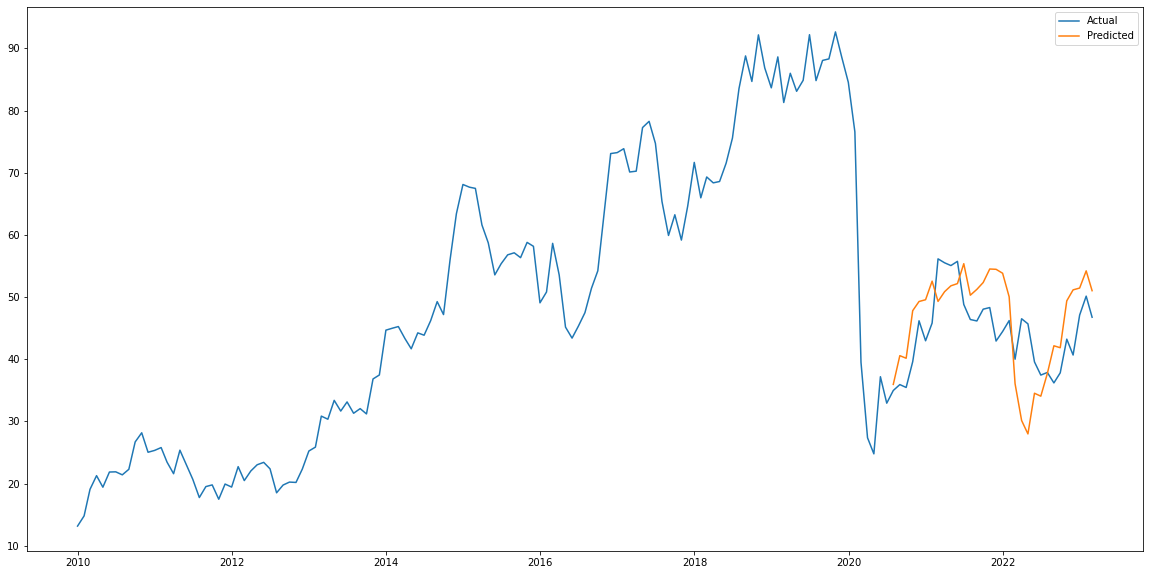

Seasonal_order: (1, 1, 2, 24) 
MSE: 48.93168302143792
Order: (1, 0, 1)


In [5]:
analyze_stock('UAL', '2010-01-01', '2023-04-03')

[*********************100%***********************]  1 of 1 completed


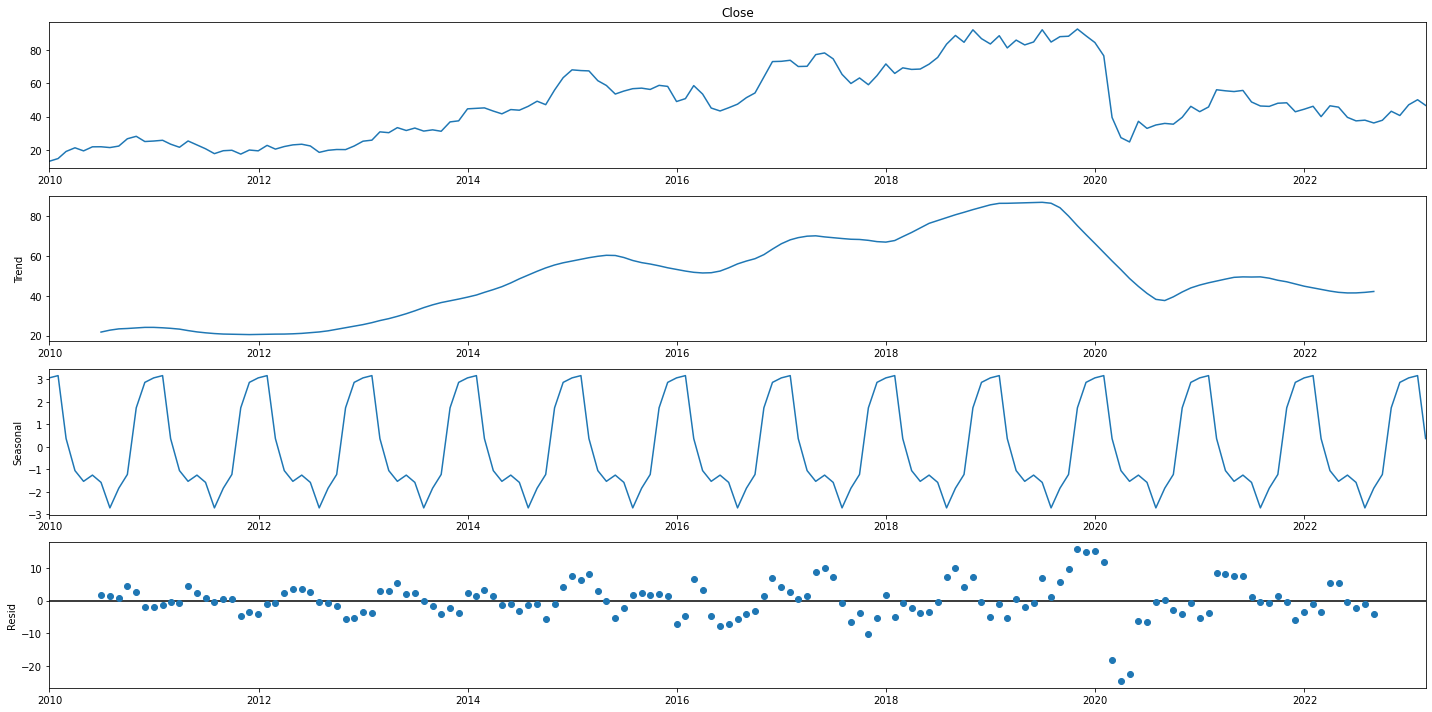

c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood opti

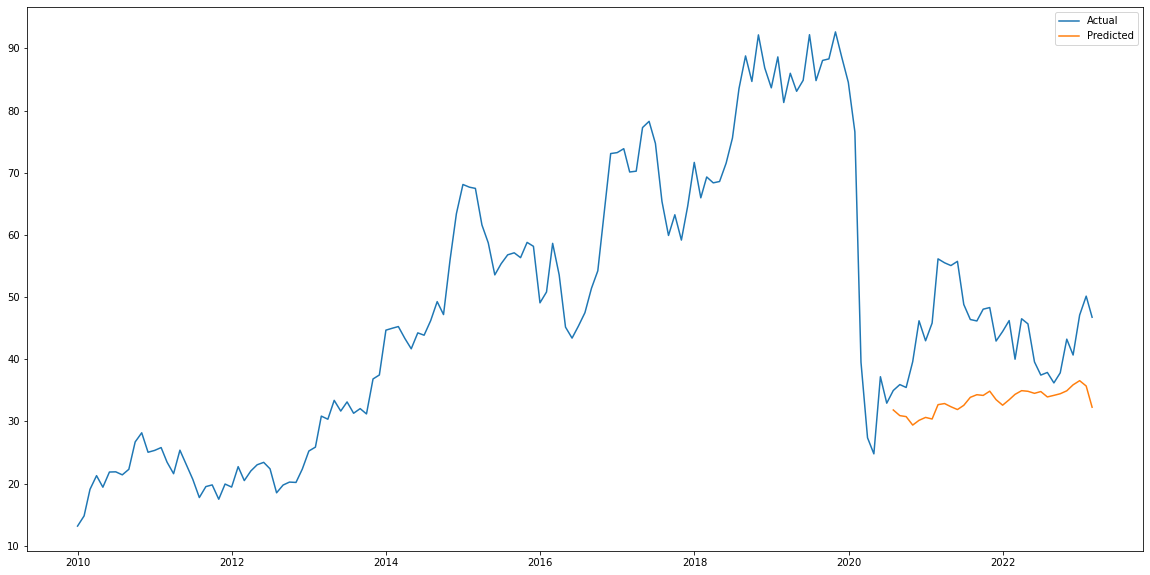

Seasonal_order: (2, 0, 2, 12) 
MSE: 163.9540149272391


In [123]:
analyze_stock('UAL', '2010-01-01', '2023-04-03')